In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import math

## Define a simple k means class

In [2]:
class K_means_simple(object):
    """This class is a simple implementation of a
        k-means algorithm. It contains a partial
        implementation of the k-means class from
        sciKit Learn"""
    
    def __init__(self, n_clusters=3, random_state=1, convergence=0, max_iter=50):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.convergence = convergence
        self.max_iter = max_iter
        
    def distance(self,a, b):
        dist = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

        return dist  
    
    def min_dist_pos(self, X ,cluster_points):
        """This method calculates to which cluster centre
            a given point is closest """
        position = []

        for x in X:
            distances = []
            for i in range(0,self.n_clusters):
                distances.append(self.distance(x,cluster_points[i]))
            pos = np.argmin(distances)
            position.append(pos)
        return np.array(position) 
        
    def update_cluster_points(self, X, pos, cluster_points):
        """This method recalculates the centre point of
            each cluster by taking the average position
            of all points belonging to it"""
        
        k = len(cluster_points)
        new_points = np.zeros((k,2))
        for i in range(0,k):
            if np.sum(pos==i) == 0:
                new_points[i] = np.random.random((1, data_dimension))
                continue
            new_points[i] = [np.mean(X[pos==i,0]),np.mean(X[pos==i,1])]

        return new_points
    
    
    def fit_predict(self, X, y=None):
        np.random.seed(self.random_state)
        cluster_points = np.random.random((self.n_clusters, data_dimension))
        
        if y is None:
            y = np.zeros(len(X))
        steps = 0
        for j in range(0,self.max_iter): 
            steps += 1
            y_temp = y
            y = self.min_dist_pos(X ,cluster_points)
            conv_criterion = np.sum(y_temp!=y)
            new_points = self.update_cluster_points(X, y, cluster_points)
            cluster_points = new_points
            if conv_criterion <= self.convergence:
                print("Convergence reached in {} steps".format(steps))
                break
            if j== self.max_iter-1:
                print("Convergence could not be reached in {} steps".format(max_iterations))
                print("{} points still alternating".format(conv_criterion))
        return y

## Create some data sets

In [3]:
#generate random data
data_dimension = 2
no_of_points = 100

# Use a seed to reproduce randomized numbers
np.random.seed(0)
X_rnd = np.random.random((no_of_points, data_dimension))

(-0.1, 1.1)

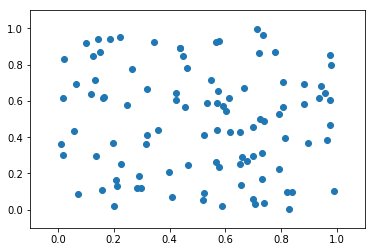

In [4]:
plt.scatter(X_rnd[:, 0], X_rnd[:, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [5]:
#generate blobs, choose number and experiment with clustering
X_blob, y_blob = make_blobs(n_samples=no_of_points, random_state=3, center_box=(0,1),cluster_std = 0.05,centers=3)

In [6]:
#add some random noise
no_of_noise_points = 30
X_noise = np.random.random((no_of_noise_points, data_dimension))
X_comb=np.concatenate((X_blob,X_noise),axis = 0)

(-0.1, 1.1)

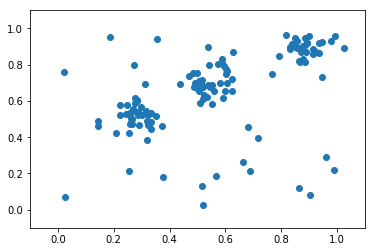

In [7]:
plt.scatter(X_comb[:, 0], X_comb[:, 1])
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

## Compare results of our simple k means class
## with the corresponding of SciKit Learn

In [8]:
# random dots
n_clusters = 4
y_scikit = KMeans(n_clusters=n_clusters).fit_predict(X_rnd)
y_simple = K_means_simple(n_clusters=n_clusters).fit_predict(X_rnd)

Convergence reached in 11 steps


(-0.1, 1.1)

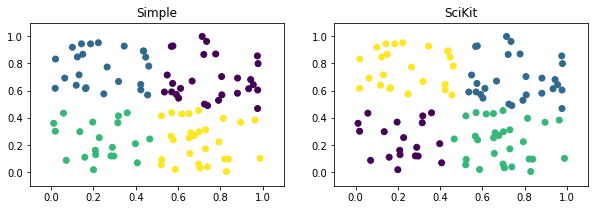

In [9]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.scatter(X_rnd[:, 0], X_rnd[:, 1], c=y_simple)
plt.title("Simple")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.subplot(122)
plt.scatter(X_rnd[:, 0], X_rnd[:, 1], c=y_scikit)
plt.title("SciKit")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

Convergence reached in 5 steps


(-0.1, 1.1)

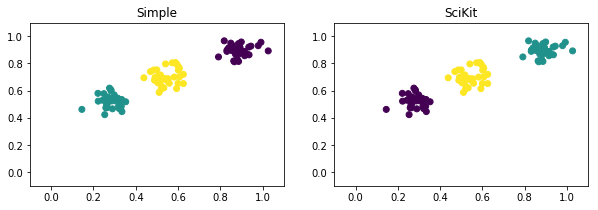

In [10]:
# Blobs

n_clusters = 3

y_simple = K_means_simple(n_clusters=n_clusters).fit_predict(X_blob)
y_scikit = KMeans(n_clusters=n_clusters).fit_predict(X_blob)

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_simple)
plt.title("Simple")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.subplot(122)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_scikit)
plt.title("SciKit")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

Convergence reached in 12 steps


(-0.1, 1.1)

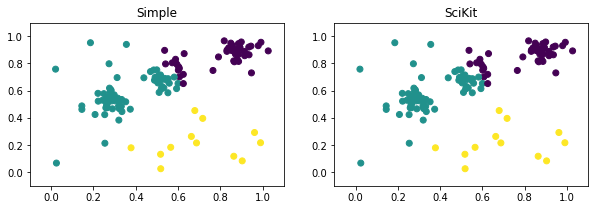

In [11]:
# With noise
n_clusters = 3

y_simple = K_means_simple(n_clusters=n_clusters).fit_predict(X_comb)
y_scikit = KMeans(n_clusters=n_clusters).fit_predict(X_comb)

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.scatter(X_comb[:, 0], X_comb[:, 1], c=y_simple)
plt.title("Simple")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.subplot(122)
plt.scatter(X_comb[:, 0], X_comb[:, 1], c=y_scikit)
plt.title("SciKit")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)